#### Define Meta-Parameters
##### Meta-Parameters

In [291]:
N_Reconfigurations = 10**2
d = 1 # Dimension of X
D = 1 # Dimension of Y

# Data Meta-Parameters
noise_level = 0.1
uncertainty_level= 0.9

# Training meta-parameters
Epochs = 10**1

##### Simulation Meta-Parameters

In [292]:
# Number of Datapoints
N_data = 10**3
# Unknown Function
def unknown_f(x):
    return np.sin(x)

#### Generate Data

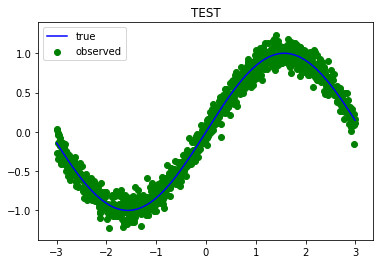

In [293]:
%run Data_Generator.ipynb # Exectute temporary training Parameters

#### Define NEU-OLS

In [285]:
%run NEU_Backend.ipynb

TensorFlow: 2.1.0
Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 2)                 0         
_________________________________________________________________
reconfiguration_unit_706 (Re (None, 2)                 10        
_________________________________________________________________
reconfiguration_unit_707 (Re (None, 2)                 10        
_________________________________________________________________
reconfiguration_unit_708 (Re (None, 2)                 10        
_________________________________________________________________
reconfiguration_unit_709 (Re (None, 2)                 10        
_________________________________________________________________
reconfiguration_unit_710 (Re (None, 2)                 10        
_________________________________________________________________
reconfiguration_unit_711 (Re (None, 2)  

### Compile NEU_OLS

In [279]:
import tensorflow_probability as tfp
def keras_NEU_OLS_loss(y_true,y_predicted):
    SEs = tf.math.pow(y_true-y_predicted,2)
    out_custom = tfp.stats.percentile(SEs, uncertainty_level)
    return out_custom

In [286]:
NEU_OLS.compile(loss='mse',
                optimizer="SGD",
                metrics=['mae', 'mse'])

### Fit NEU OLS

In [287]:
history = NEU_OLS.fit(
  data_NEU, data_y,
  epochs=Epochs)

Epoch 1/10
1000/1000 [==============================] - 70s 70ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 2/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 3/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 4/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 5/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 6/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 7/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 8/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 9/10
100

In [294]:
NEU_prediction = NEU_OLS.predict(data_NEU)

### Evaluate Benchmark Regression Models

In [295]:
%run Regression_Benchmark_Models.ipynb

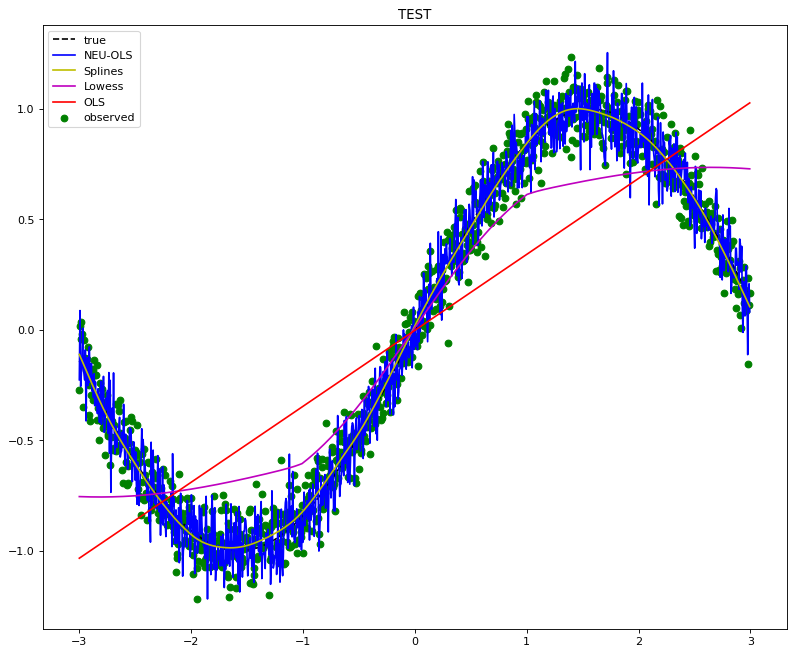

In [302]:
import matplotlib.pyplot as plt
# Adjust Figure Details
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# Plot Models
plt.plot(data_x,true_y,color='k',label='true',linestyle='--')
plt.plot(data_x,NEU_prediction,color='b',label='NEU-OLS')
plt.plot(data_x,f_hat_smoothing_splines,color='y',label='Splines')
plt.plot(data_x,f_hat_lowess,color='m',label='Lowess')
plt.plot(data_x,model_pred_y,color='r',label='OLS')

# Add Legends
plt.scatter(data_x,data_y,color='g',label='observed')
plt.legend(loc="upper left")
plt.title("TEST")
plt.show()